# **Customer Behavior Analytics Project**

### **Problem Statement:**
**Customer Behaviour Analytics for Strategic Business Optimization**

### **Context** :

Businesses increasingly rely on advanced analytics to predict customer behaviour and optimize operations. Accurately predicting whether a customer **will make a purchase** and estimating their **annual spending** allows companies to fine-tune marketing efforts, design personalized offers, and improve customer retention. However, this requires handling complex, noisy datasets, selecting the right features, and engineering new ones to capture nuanced customer behaviour.

### **Objective :**

The goal is to develop a machine learning model to predict the customer **Will_Purchase** or not and customers **Annual_Spending**.

1.	A **classification model** to predict the likelihood of a customer making a purchase (Will_Purchase), using both direct and derived behavioural indicators.

2.	A **regression model** to predict the annual spending (Annual_Spending) of a customer, taking into account multiple nonlinear interactions and latent patterns.


### **Dataset Overview :** 

The dataset contains **50,000 entries** representing customer data, enriched with complex interactions and noise to simulate real-world scenarios. It includes:

1.	**Demographic features:** Age, Gender, Marital Status, Education Level.

2.	**Behavioural features:** Purchases in the last month, Online activity level, Days since last purchase, Customer loyalty score.

3.	**Derived features:** Age-to-income ratio, Online purchase tendency, and Income category.

4.	**Complex interactions:**

	Nonlinear relationships between features (e.g., Age vs. Income).


    Latent behaviour patterns like combined loyalty and purchasing frequency.

  
6.	**Target variables:**

	   Will_Purchase: Binary (1 = Yes, 0 = No).

	   Annual_Spending: Continuous value indicating yearly spending in dollars.

  


Here we import necessary libraries for the project

In [1]:
import pandas as pd       #for data handling and data manipulation
import numpy as np        #for mathematical and numerical operations
import matplotlib.pyplot as plt      #for visualizations
import seaborn as sns        #for advance visualization
from sklearn.linear_model import LogisticRegression     #for logistic regression classification 
from sklearn.model_selection import train_test_split     #for split training and testing dataset
from sklearn import metrics           #for confusion matrix
from sklearn.ensemble import GradientBoostingClassifier     #for gradient boosting classification
from sklearn.metrics import accuracy_score, classification_report      #to check model accuracy and classification report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error   #for evaluating regression models
from sklearn.preprocessing import StandardScaler       #for standardization
from sklearn.preprocessing import LabelEncoder         #for converting categorical column into numerical column, for encoding
from sklearn.ensemble import RandomForestClassifier    #for random forest classification
from xgboost import XGBClassifier               #for xgboost classification
from sklearn.neighbors import KNeighborsClassifier      #for knn classification
from sklearn.linear_model import LinearRegression    #for linear regression
from sklearn.tree import DecisionTreeRegressor        #for decision tree regression
from sklearn.ensemble import RandomForestRegressor     #for random forest regression

 



In [2]:
df = pd.read_csv("C:\\Users\\sneha\\Downloads\\customerbehaviouranalytics.csv")    #reading csv file of dataset using pandas

### **EDA - Exploratory Data Analysis**

In [3]:
df.head()    #printing first five rows

Age     Income Marital_Status  Gender Education_Level  \
0   66   91643.09       Divorced  Female             PhD   
1   47   30683.60        Married    Male     High School   
2   52  125322.93         Single  Female             PhD   
3   65   31508.33         Single    Male     High School   
4   31   75736.11        Married  Female     High School   

   Purchases_in_Last_Month  Online_Activity_Level Product_Interest  \
0                        1                   0.26        Groceries   
1                        5                   0.26      Electronics   
2                        2                   0.85        Groceries   
3                        6                   0.31      Electronics   
4                        2                   0.21      Electronics   

   Days_Since_Last_Purchase  Customer_Loyalty_Score Income_Category  \
0                       346                    0.18            High   
1                        39                    6.40             Low   
2                       154                    6.18            High   
3                        33                    3.31             Low   
4                       277                    4.39             Low   

   Age_Income_Ratio  Is_Young_Professional  Online_Purchase_Tendency  \
0            0.0007                      0                      0.26   
1            0.0015                      0                      1.30   
2            0.0004                      0                      1.70   
3            0.0021                      0                      1.86   
4            0.0004                      1                      0.42   

   Will_Purchase  Annual_Spending  
0              0          4173.07  
1              0          5464.92  
2              0          9310.01  
3              0          6488.02  
4              0          6233.64

In [4]:
df.info()     #summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Income                    50000 non-null  float64
 2   Marital_Status            50000 non-null  object 
 3   Gender                    50000 non-null  object 
 4   Education_Level           50000 non-null  object 
 5   Purchases_in_Last_Month   50000 non-null  int64  
 6   Online_Activity_Level     50000 non-null  float64
 7   Product_Interest          50000 non-null  object 
 8   Days_Since_Last_Purchase  50000 non-null  int64  
 9   Customer_Loyalty_Score    50000 non-null  float64
 10  Income_Category           50000 non-null  object 
 11  Age_Income_Ratio          50000 non-null  float64
 12  Is_Young_Professional     50000 non-null  int64  
 13  Online_Purchase_Tendency  50000 non-null  float64
 14  Will_P

In [5]:
df.isnull().sum()    #to check missing values

Age                         0
Income                      0
Marital_Status              0
Gender                      0
Education_Level             0
Purchases_in_Last_Month     0
Online_Activity_Level       0
Product_Interest            0
Days_Since_Last_Purchase    0
Customer_Loyalty_Score      0
Income_Category             0
Age_Income_Ratio            0
Is_Young_Professional       0
Online_Purchase_Tendency    0
Will_Purchase               0
Annual_Spending             0
dtype: int64

In [6]:
df.duplicated().sum()      #to check total number of duplicates

0

In [7]:
df.shape     #to check how many no of rows and columns are in the dataset

(50000, 16)

In [8]:
df.nunique()     #checking the number of unique values in the datset

Age                            53
Income                      49889
Marital_Status                  3
Gender                          2
Education_Level                 4
Purchases_in_Last_Month        20
Online_Activity_Level          91
Product_Interest                4
Days_Since_Last_Purchase      365
Customer_Loyalty_Score       1001
Income_Category                 2
Age_Income_Ratio               35
Is_Young_Professional           2
Online_Purchase_Tendency      862
Will_Purchase                   2
Annual_Spending             48834
dtype: int64

In [9]:
df.describe()    #statistical summary of the dataset

Age         Income  Purchases_in_Last_Month  \
count  50000.000000   50000.000000             50000.000000   
mean      44.001300   85228.130454                 9.490520   
std       15.307342   37563.144114                 5.762841   
min       18.000000   20006.180000                 0.000000   
25%       31.000000   52857.320000                 4.000000   
50%       44.000000   84942.685000                 9.000000   
75%       57.000000  118032.180000                14.000000   
max       70.000000  149986.360000                19.000000   

       Online_Activity_Level  Days_Since_Last_Purchase  \
count           50000.000000              50000.000000   
mean                0.551041                182.297140   
std                 0.259925                105.226576   
min                 0.100000                  0.000000   
25%                 0.330000                 91.000000   
50%                 0.550000                182.000000   
75%                 0.770000                273.000000   
max                 1.000000                364.000000   

       Customer_Loyalty_Score  Age_Income_Ratio  Is_Young_Professional  \
count            50000.000000      50000.000000           50000.000000   
mean                 4.980391          0.000679               0.225160   
std                  2.887686          0.000505               0.417692   
min                  0.000000          0.000100               0.000000   
25%                  2.480000          0.000300               0.000000   
50%                  4.990000          0.000500               0.000000   
75%                  7.480000          0.000800               0.000000   
max                 10.000000          0.003500               1.000000   

       Online_Purchase_Tendency  Will_Purchase  Annual_Spending  
count              50000.000000   50000.000000     50000.000000  
mean                   5.228464       0.243780      7206.142547  
std                    4.289666       0.429366      2985.346473  
min                    0.000000       0.000000     -4925.750000  
25%                    1.760000       0.000000      5156.155000  
50%                    4.080000       0.000000      7213.520000  
75%                    7.840000       0.000000      9267.867500  
max                   19.000000       1.000000     20175.400000

In [10]:
df.head()     #printing first five rows

Age     Income Marital_Status  Gender Education_Level  \
0   66   91643.09       Divorced  Female             PhD   
1   47   30683.60        Married    Male     High School   
2   52  125322.93         Single  Female             PhD   
3   65   31508.33         Single    Male     High School   
4   31   75736.11        Married  Female     High School   

   Purchases_in_Last_Month  Online_Activity_Level Product_Interest  \
0                        1                   0.26        Groceries   
1                        5                   0.26      Electronics   
2                        2                   0.85        Groceries   
3                        6                   0.31      Electronics   
4                        2                   0.21      Electronics   

   Days_Since_Last_Purchase  Customer_Loyalty_Score Income_Category  \
0                       346                    0.18            High   
1                        39                    6.40             Low   
2                       154                    6.18            High   
3                        33                    3.31             Low   
4                       277                    4.39             Low   

   Age_Income_Ratio  Is_Young_Professional  Online_Purchase_Tendency  \
0            0.0007                      0                      0.26   
1            0.0015                      0                      1.30   
2            0.0004                      0                      1.70   
3            0.0021                      0                      1.86   
4            0.0004                      1                      0.42   

   Will_Purchase  Annual_Spending  
0              0          4173.07  
1              0          5464.92  
2              0          9310.01  
3              0          6488.02  
4              0          6233.64

Separating numerical and categorical columns

In [11]:
categorical_columns = ["Marital_Status","Gender","Education_Level","Product_Interest","Income_Category"]
numerical_columns = ["Age","Income","Purchases_in_Last_Month","Online_Activity_Level","Days_Since_Last_Purchase","Customer_Loyalty_Score","Age_Income_Ratio","Is_Young_Professional","Online_Purchase_Tendency","Will_Purchase","Annual_Spending"]

### **Visualizations**

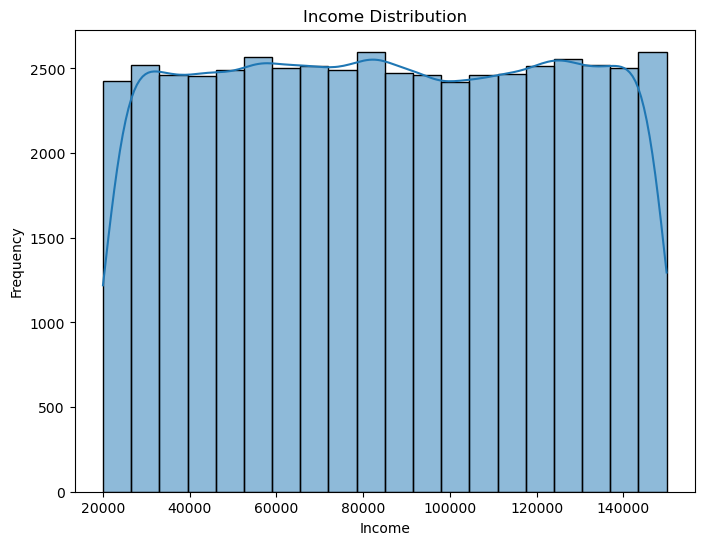

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['Income'],bins=20,kde=True)
plt.title("Income Distribution")
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

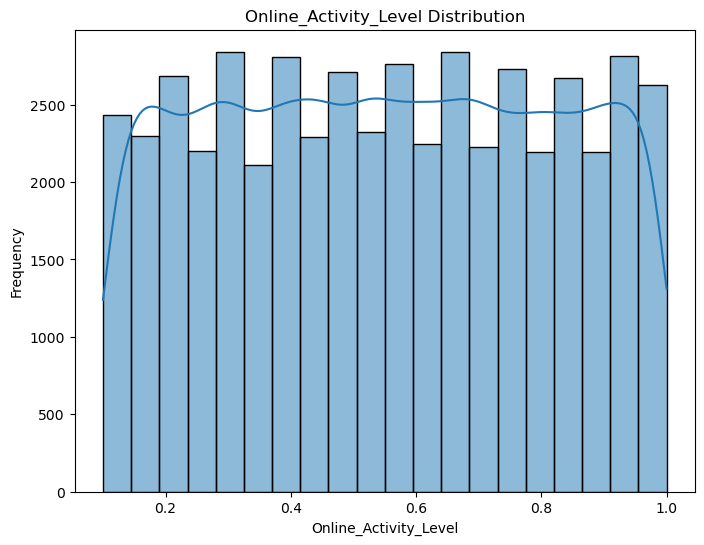

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(df['Online_Activity_Level'],bins=20,kde=True)
plt.title("Online_Activity_Level Distribution")
plt.xlabel('Online_Activity_Level')
plt.ylabel('Frequency')
plt.show()

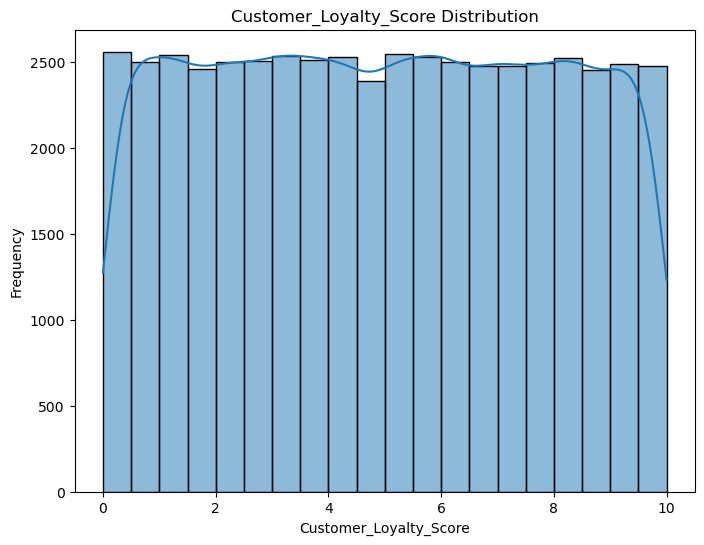

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df['Customer_Loyalty_Score'],bins=20,kde=True)
plt.title("Customer_Loyalty_Score Distribution")
plt.xlabel('Customer_Loyalty_Score')
plt.ylabel('Frequency')
plt.show()

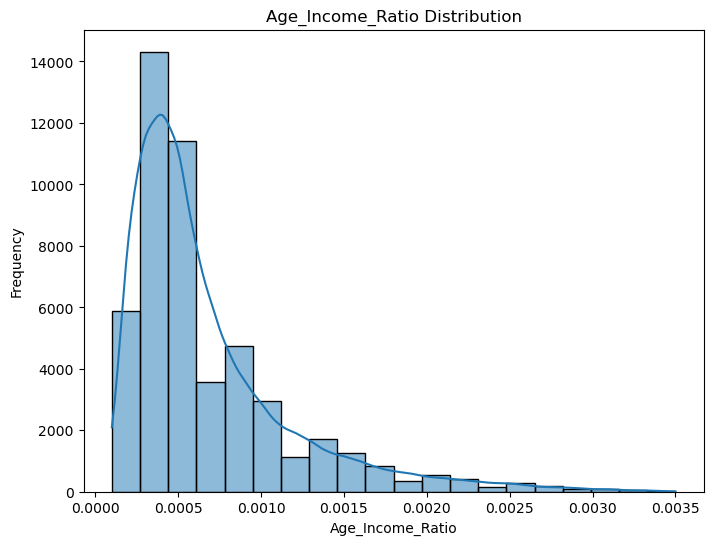

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age_Income_Ratio'],bins=20,kde=True)
plt.title("Age_Income_Ratio Distribution")
plt.xlabel('Age_Income_Ratio')
plt.ylabel('Frequency')
plt.show()

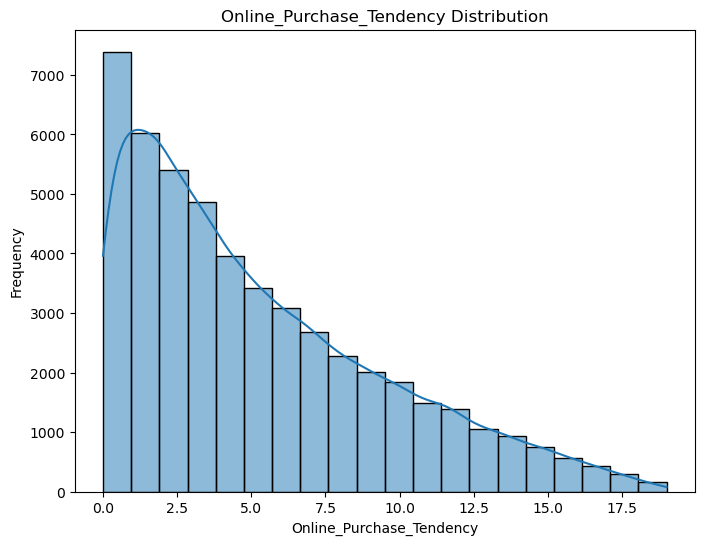

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(df['Online_Purchase_Tendency'],bins=20,kde=True)
plt.title("Online_Purchase_Tendency Distribution")
plt.xlabel('Online_Purchase_Tendency')
plt.ylabel('Frequency')
plt.show()

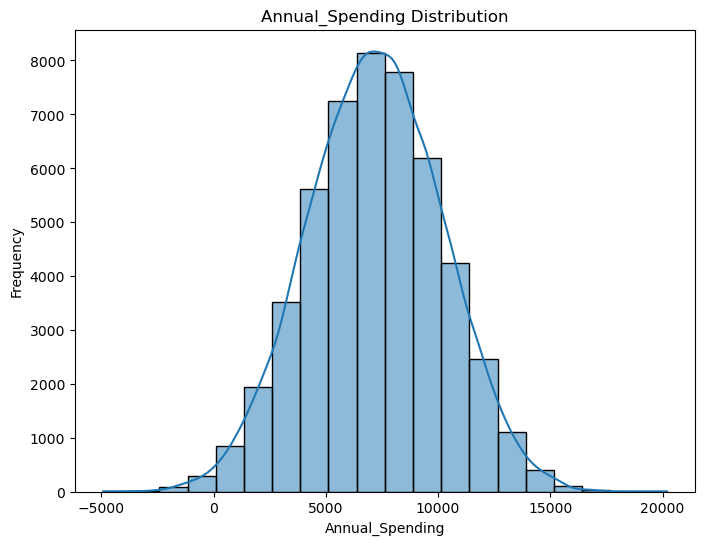

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df['Annual_Spending'],bins=20,kde=True)
plt.title("Annual_Spending Distribution")
plt.xlabel('Annual_Spending')
plt.ylabel('Frequency')
plt.show()

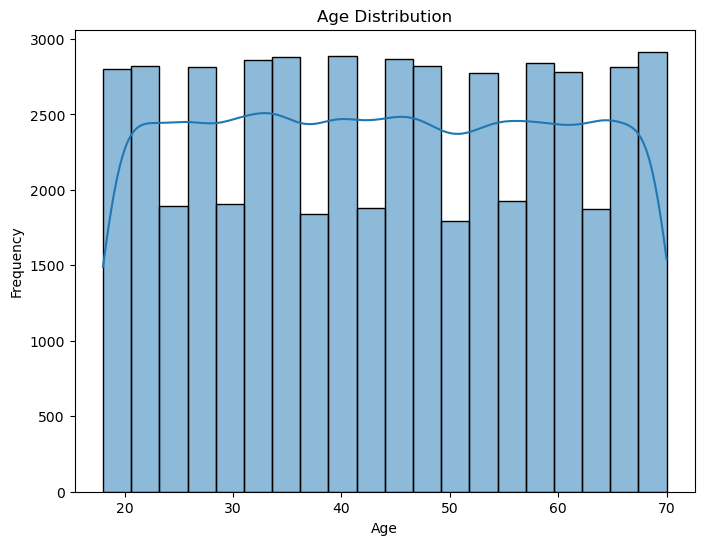

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],bins=20,kde=True)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

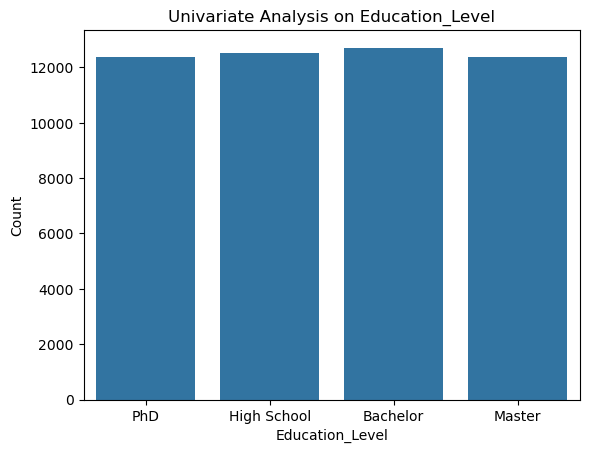

In [19]:
plt.figure(figure=(15,5))
sns.countplot(x="Education_Level",data=df,)
plt.title("Univariate Analysis on Education_Level")
plt.xlabel("Education_Level")
plt.ylabel("Count")
plt.show()

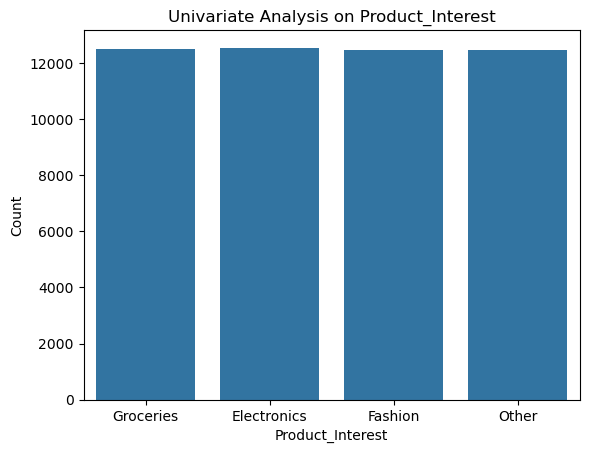

In [20]:
plt.figure(figure=(15,5))
sns.countplot(x="Product_Interest",data=df,)
plt.title("Univariate Analysis on Product_Interest")
plt.xlabel("Product_Interest")
plt.ylabel("Count")
plt.show()

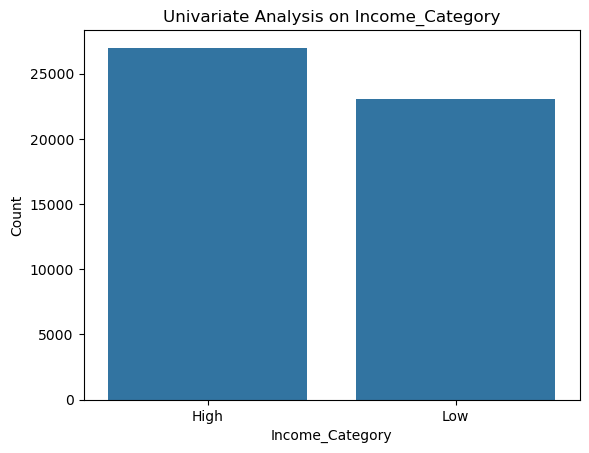

In [21]:
plt.figure(figure=(15,5))
sns.countplot(x="Income_Category",data=df,)
plt.title("Univariate Analysis on Income_Category")
plt.xlabel("Income_Category")
plt.ylabel("Count")
plt.show()

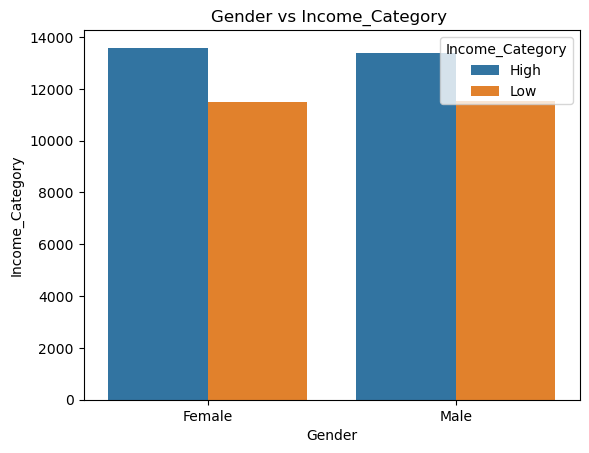

In [22]:
plt.figure(figure=(10,8))
sns.countplot(x="Gender",hue="Income_Category",data=df)
plt.title("Gender vs Income_Category ")
plt.xlabel("Gender")
plt.ylabel("Income_Category")
plt.show()

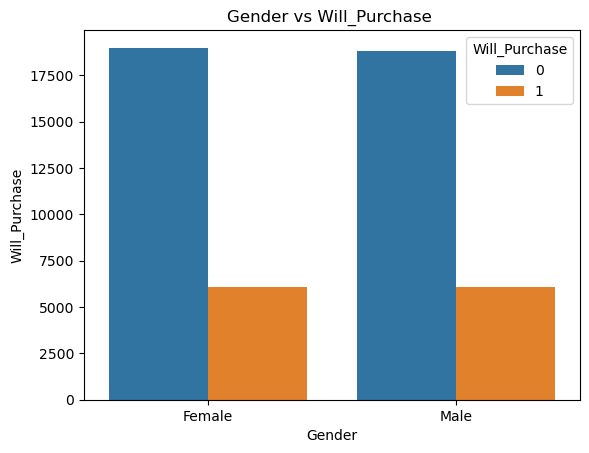

In [23]:
#Gender vs Will_purchase
plt.figure(figure=(10,8))
sns.countplot(x="Gender",hue="Will_Purchase",data=df)
plt.title("Gender vs Will_Purchase ")
plt.xlabel("Gender")
plt.ylabel("Will_Purchase")
plt.show()

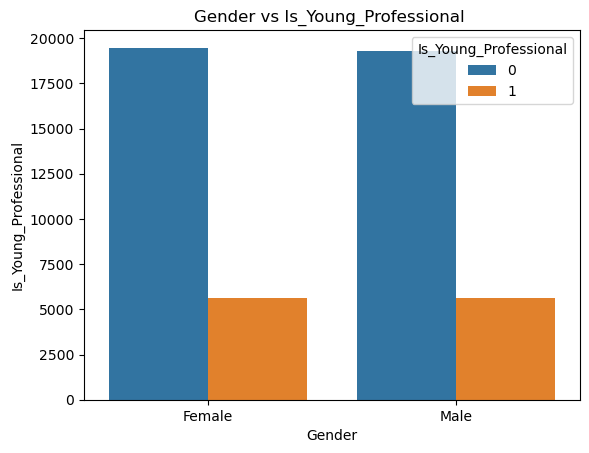

In [24]:
plt.figure(figure=(10,8))
sns.countplot(x="Gender",hue="Is_Young_Professional",data=df)
plt.title("Gender vs Is_Young_Professional ")
plt.xlabel("Gender")
plt.ylabel("Is_Young_Professional")
plt.show()

<Axes: title={'center': 'Boxplot of Income'}, ylabel='Income'>

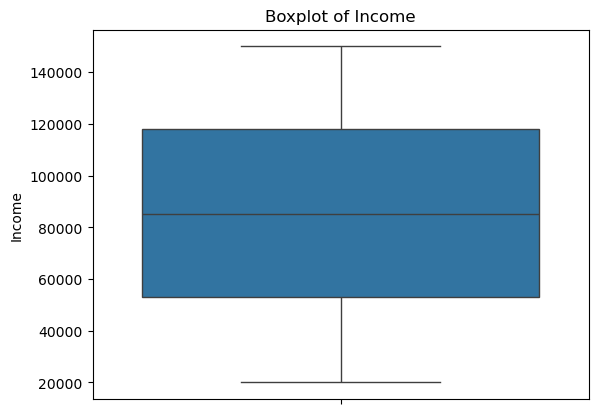

In [25]:
plt.figure(figure=(10,12))
plt.title("Boxplot of Income")
sns.boxplot(df["Income"])

<Axes: title={'center': 'Annual_Spending'}, ylabel='Annual_Spending'>

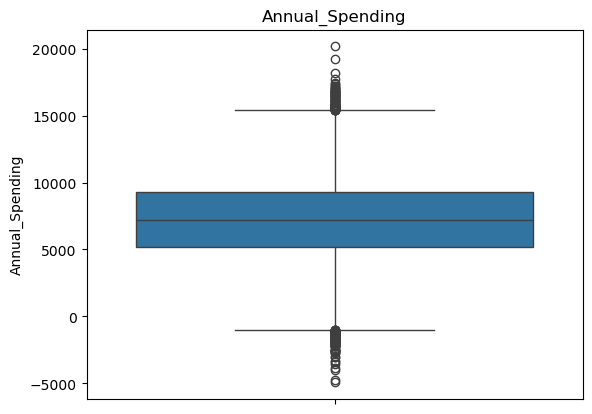

In [26]:
plt.figure(figure=(10,12))
plt.title("Annual_Spending")
sns.boxplot(df["Annual_Spending"])

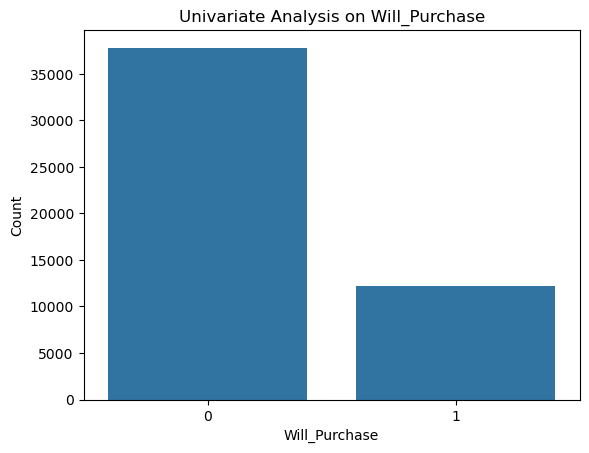

In [27]:
plt.figure(figure=(15,5))
sns.countplot(x="Will_Purchase",data=df,)
plt.title("Univariate Analysis on Will_Purchase")
plt.xlabel("Will_Purchase")
plt.ylabel("Count")
plt.show()

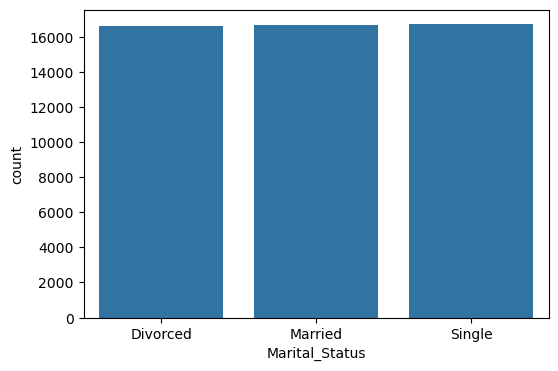

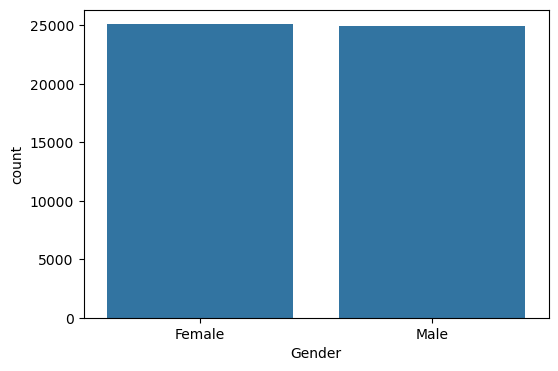

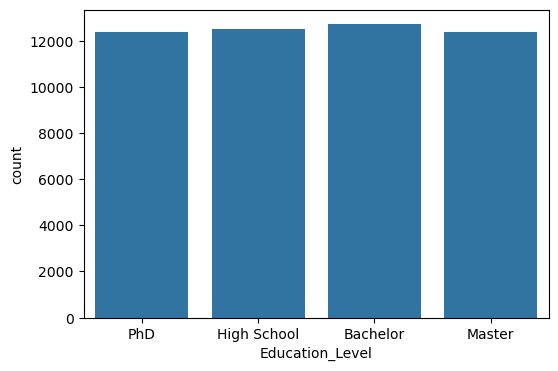

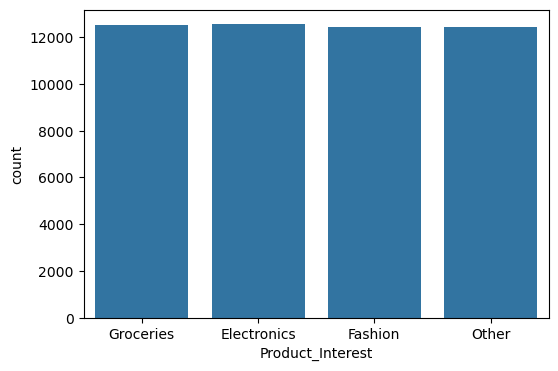

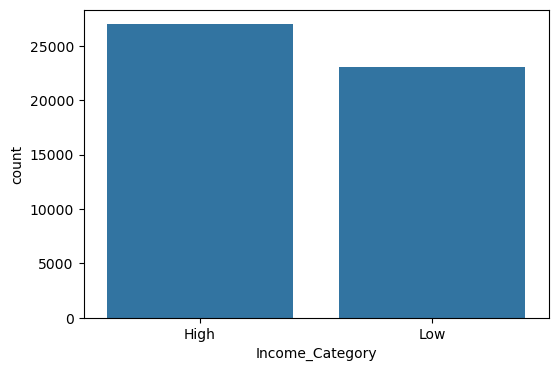

In [28]:
def univatiate_categorical(n):
    for column in n:
        plt.figure(figsize=(6,4))
        counts=sns.countplot(x=column,data=df)
univatiate_categorical(categorical_columns)

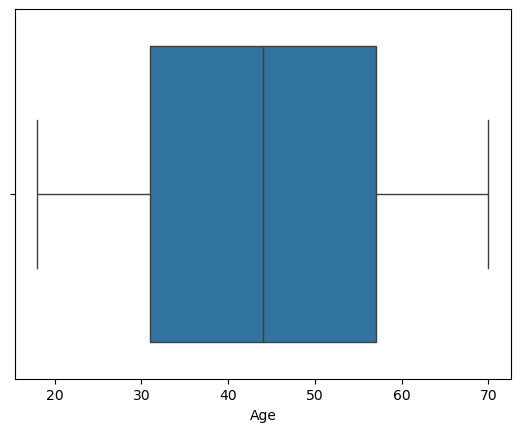

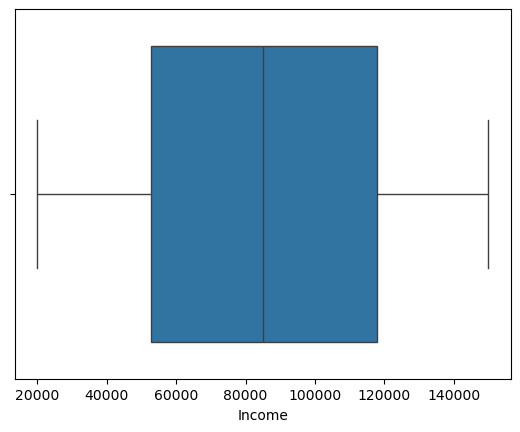

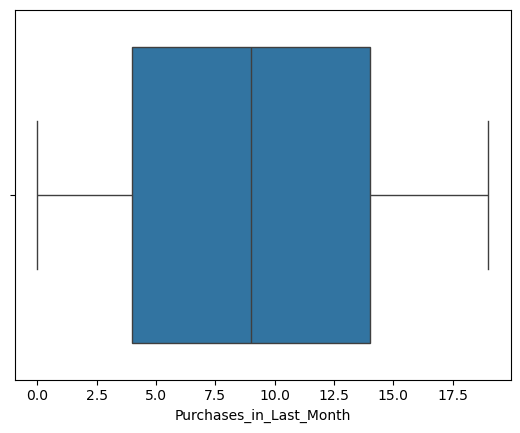

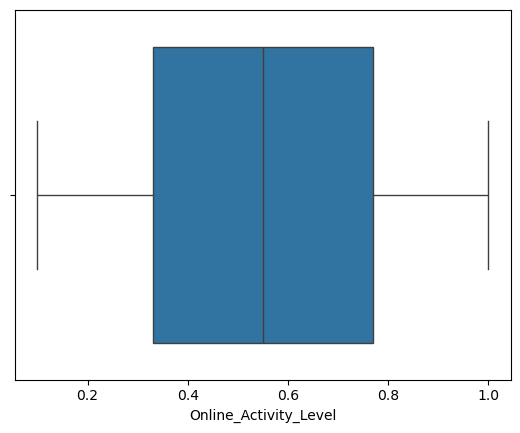

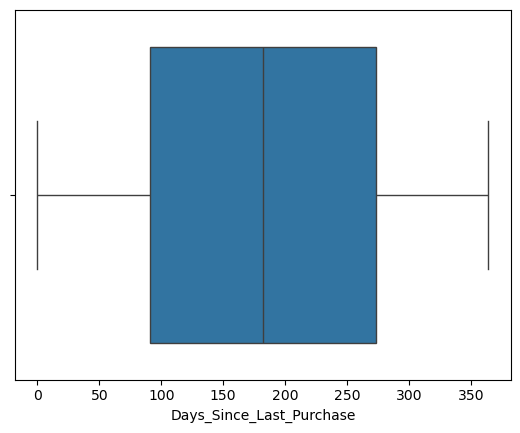

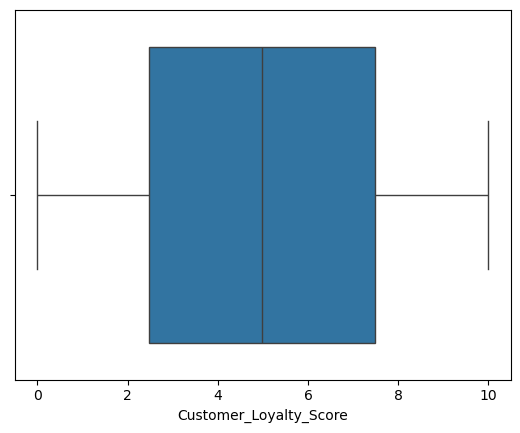

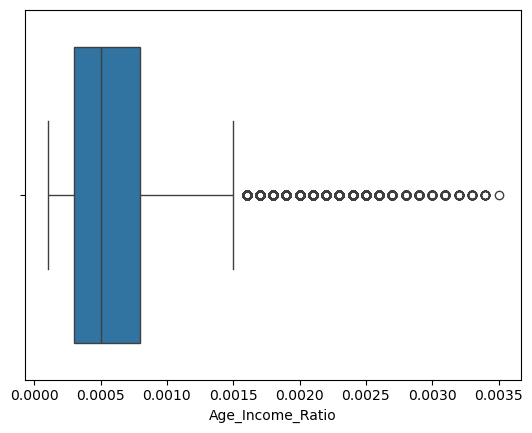

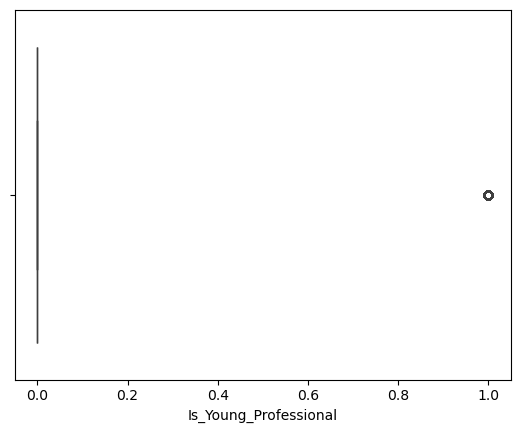

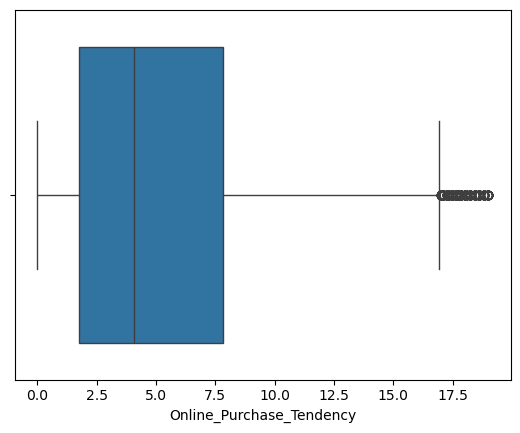

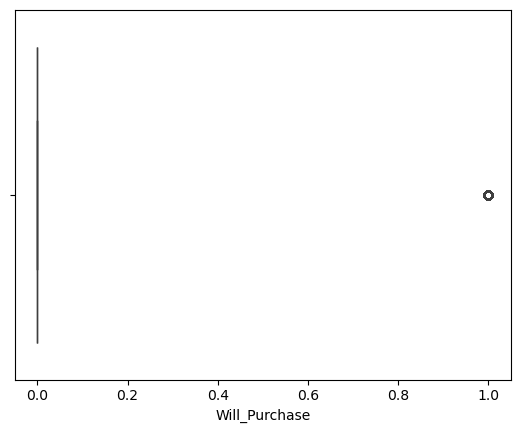

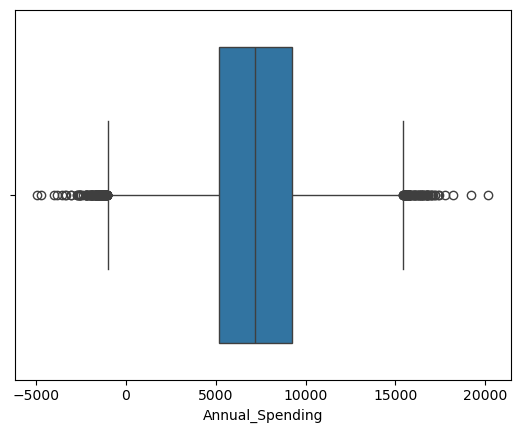

In [29]:
def box_numerical(n):
    for column in n:
        plt.figure(figure=(6,4))
        boxs=sns.boxplot(x=column,data=df)
box_numerical(numerical_columns)

In [30]:
df["Will_Purchase"].value_counts()       #count of will purchase or not

Will_Purchase
0    37811
1    12189
Name: count, dtype: int64

**0    for not will purchase**

**1    for will purchase**

In [31]:
df1 = df.copy()    
categorical_columns = ["Marital_Status","Gender","Education_Level","Product_Interest","Income_Category"]
le = LabelEncoder()
for col in categorical_columns:
    df1[col]=le.fit_transform(df1[col])

In [32]:
df1.head()      #printing first five rows

Age     Income  Marital_Status  Gender  Education_Level  \
0   66   91643.09               0       0                3   
1   47   30683.60               1       1                1   
2   52  125322.93               2       0                3   
3   65   31508.33               2       1                1   
4   31   75736.11               1       0                1   

   Purchases_in_Last_Month  Online_Activity_Level  Product_Interest  \
0                        1                   0.26                 2   
1                        5                   0.26                 0   
2                        2                   0.85                 2   
3                        6                   0.31                 0   
4                        2                   0.21                 0   

   Days_Since_Last_Purchase  Customer_Loyalty_Score  Income_Category  \
0                       346                    0.18                0   
1                        39                    6.40                1   
2                       154                    6.18                0   
3                        33                    3.31                1   
4                       277                    4.39                1   

   Age_Income_Ratio  Is_Young_Professional  Online_Purchase_Tendency  \
0            0.0007                      0                      0.26   
1            0.0015                      0                      1.30   
2            0.0004                      0                      1.70   
3            0.0021                      0                      1.86   
4            0.0004                      1                      0.42   

   Will_Purchase  Annual_Spending  
0              0          4173.07  
1              0          5464.92  
2              0          9310.01  
3              0          6488.02  
4              0          6233.64

Calculating correlation matrix for numerical columns after encoding

In [33]:
corr_mat = df1.corr()    

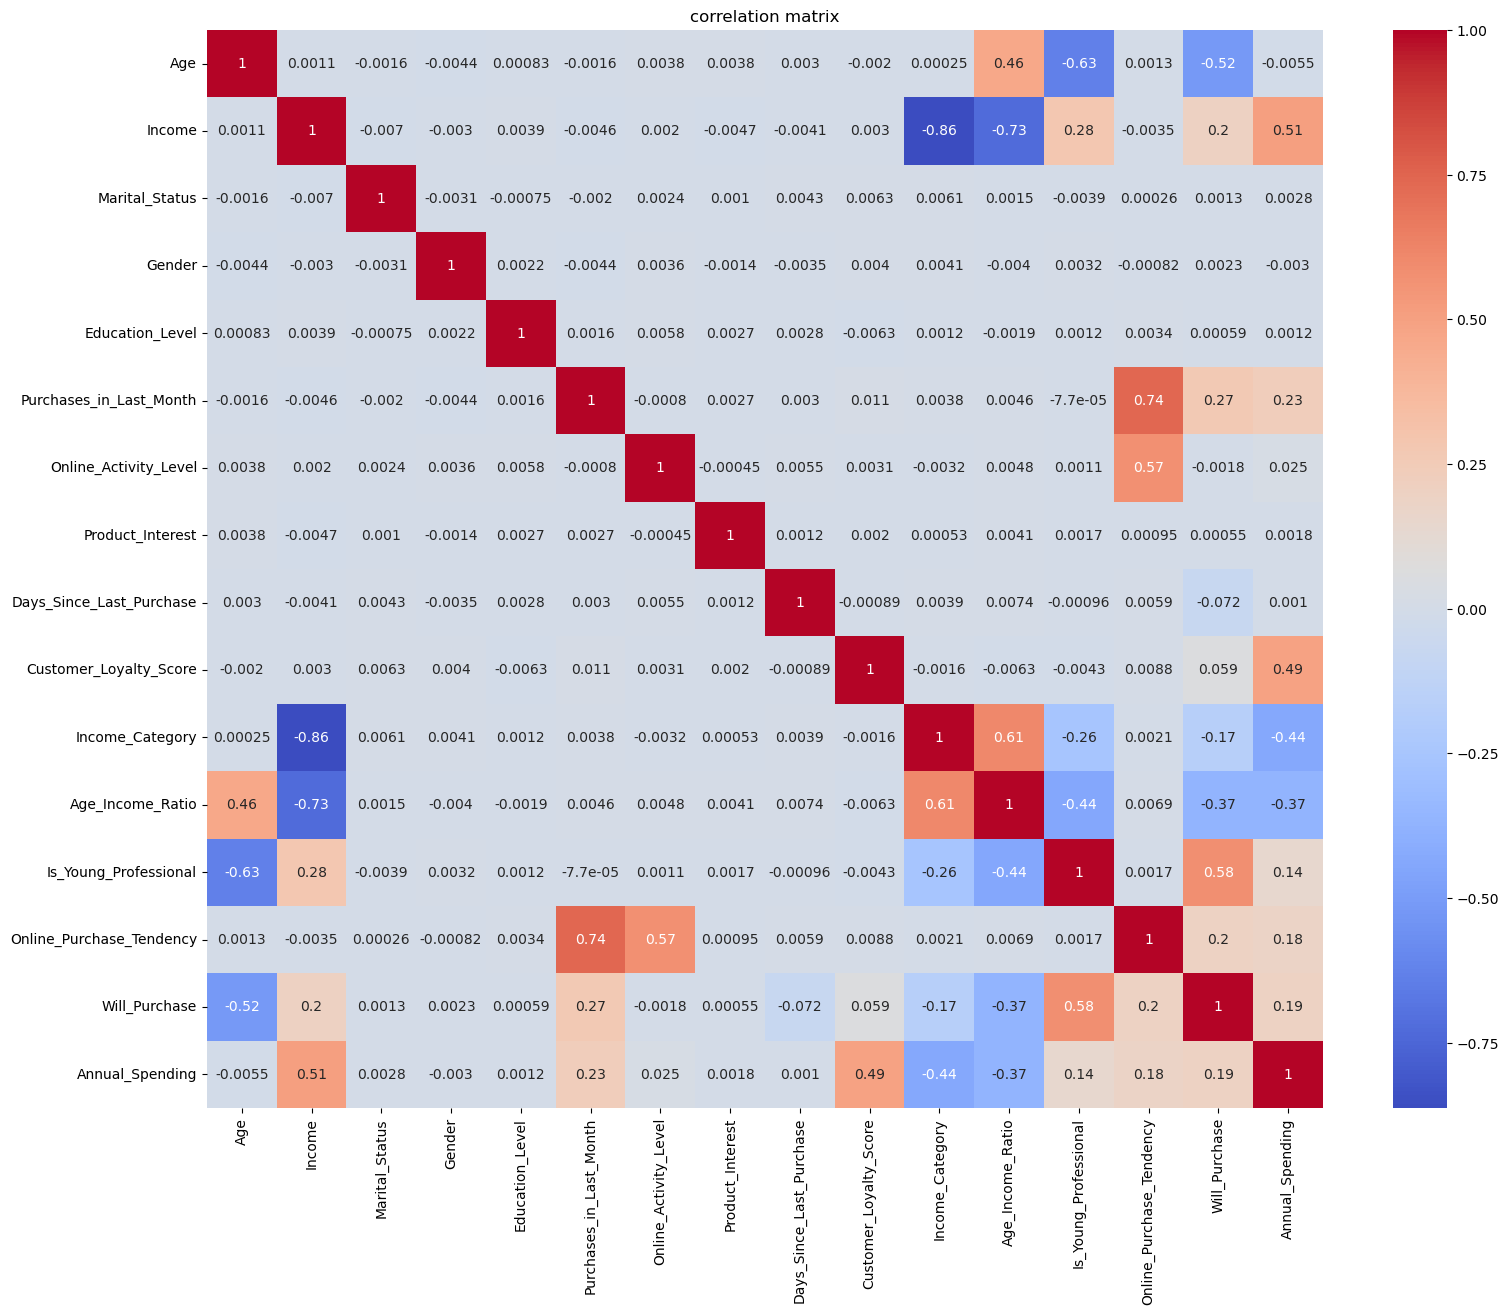

In [34]:
#correlation matrix
plt.figure(figsize=(18,14))
sns.heatmap(corr_mat,annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

#### **Insights from Correlation matrix**

Strongly Positive Correlated are -

**Purchases_in_Last_Month** VS **Online_Purchase_Tendency**

**Online_Purchase_Tendency** VS **Online_Activity_Level**

**Online_Activity_Level** VS **Age_Income_Ratio**

Strongly Negative Correlated are -

**Income_Category** VS **Income**

**Age_Income_Ratio** VS **Income**

**Is_Young_Professional** VS **Age**





In [35]:
from ydata_profiling import ProfileReport
dataReport = ProfileReport(df1, title="Profiling Report")
dataReport.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
df1.columns     #printing all columns in the dataset

Index(['Age', 'Income', 'Marital_Status', 'Gender', 'Education_Level',
       'Purchases_in_Last_Month', 'Online_Activity_Level', 'Product_Interest',
       'Days_Since_Last_Purchase', 'Customer_Loyalty_Score', 'Income_Category',
       'Age_Income_Ratio', 'Is_Young_Professional', 'Online_Purchase_Tendency',
       'Will_Purchase', 'Annual_Spending'],
      dtype='object')

**Seperating x and y**

**x** contains independant variables and
**y** contains dependant or **target variable**

In [37]:
x=df1.drop(columns=["Will_Purchase"])
y=df1["Will_Purchase"]

In [38]:
print(x)    #independant features

       Age     Income  Marital_Status  Gender  Education_Level  \
0       66   91643.09               0       0                3   
1       47   30683.60               1       1                1   
2       52  125322.93               2       0                3   
3       65   31508.33               2       1                1   
4       31   75736.11               1       0                1   
...    ...        ...             ...     ...              ...   
49995   24   39049.29               2       1                3   
49996   69  102566.21               0       0                3   
49997   34  114722.99               1       1                0   
49998   39   64790.09               2       0                0   
49999   61  116965.23               2       1                2   

       Purchases_in_Last_Month  Online_Activity_Level  Product_Interest  \
0                            1                   0.26                 2   
1                            5                   0.26    

In [39]:
print(y)     #dependant feature

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Will_Purchase, Length: 50000, dtype: int64


#### **Data Standardization**

Scales data to have a mean of 0 and a standard deviation of 1

In [40]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)

[[ 1.43714831  0.17077973 -1.22773233 ... -0.5390631  -1.1582518
  -1.01599694]
 [ 0.19590142 -1.45209027 -0.00271953 ... -0.5390631  -0.91580625
  -0.58326227]
 [ 0.52254534  1.067408    1.22229328 ... -0.5390631  -0.82255796
   0.70473847]
 ...
 [-0.65337276  0.78521527 -0.00271953 ...  1.8550704  -1.092978
   0.52984579]
 [-0.32672884 -0.54410368  1.22229328 ... -0.5390631  -1.04169144
  -0.48013083]
 [ 1.11050439  0.84490842  1.22229328 ... -0.5390631   1.59490387
   1.4727709 ]]


In [41]:
x = standardized_data
y = df1["Will_Purchase"]
#splitting 70% data for training and 30% data for testing
# x_train –  independant values used to train the model.
# x_test –  independant values used to test the model.
# y_train – The target values used for training.
# y_test – The target values used for testing.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In this dataset their are 50000 records and from which 35000 records are using for train the model and 15000 records are using for test the model

In [42]:
print(x.shape, x_train.shape, x_test.shape)     

(50000, 15) (35000, 15) (15000, 15)


### **Classification Model**

In [43]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

print("Logistic Regression Classification\n: ",classification_report(y_test,y_predlr))
print("Accuracy Score on the training data\n: ",accuracy_score(y_test,y_predlr))

Logistic Regression Classification
:                precision    recall  f1-score   support

           0       0.91      0.95      0.93     11361
           1       0.81      0.71      0.76      3639

    accuracy                           0.89     15000
   macro avg       0.86      0.83      0.84     15000
weighted avg       0.89      0.89      0.89     15000

Accuracy Score on the training data
:  0.8887333333333334


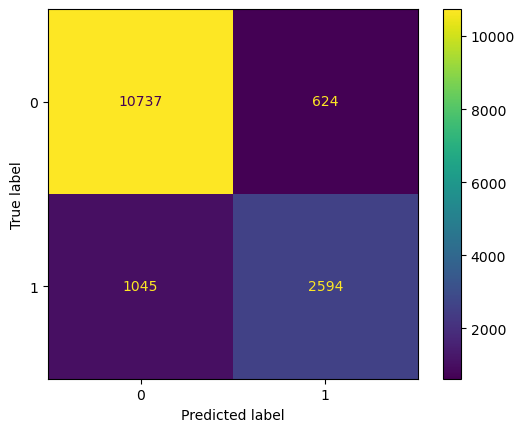

In [44]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predlr)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1])
cm_display.plot()
plt.show()

In [45]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=lr.predict(x_test)

print("Random Forest Classification\n: ",classification_report(y_test,y_predrf))
print("Accuracy\n: ",accuracy_score(y_test,y_predrf))

Random Forest Classification
:                precision    recall  f1-score   support

           0       0.91      0.95      0.93     11361
           1       0.81      0.71      0.76      3639

    accuracy                           0.89     15000
   macro avg       0.86      0.83      0.84     15000
weighted avg       0.89      0.89      0.89     15000

Accuracy
:  0.8887333333333334


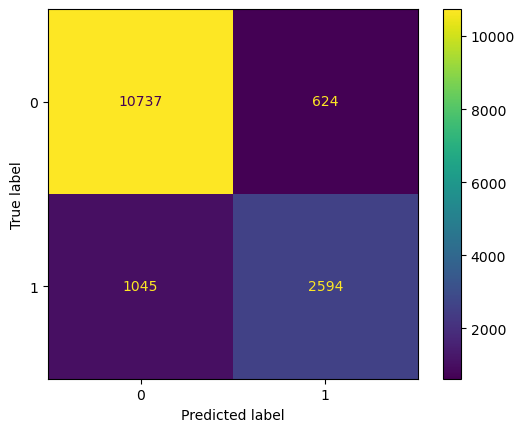

In [46]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predrf)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1])
cm_display.plot()
plt.show()

In [47]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(x_train, y_train)
y_predgb = gbc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_predgb))
print("\nClassification Report:\n", classification_report(y_test, y_predgb))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11361
           1       1.00      1.00      1.00      3639

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



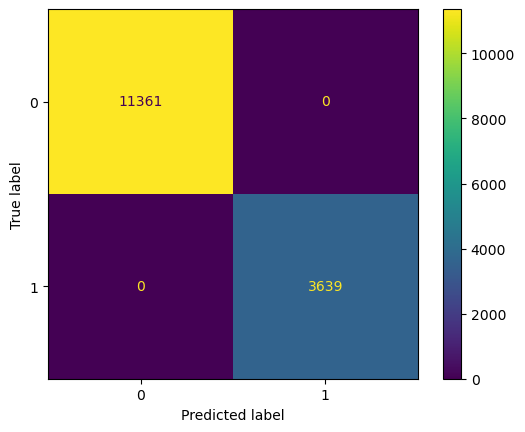

In [48]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predgb)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1])
cm_display.plot()
plt.show()

In [49]:
xgb = XGBClassifier( random_state=42)
xgb.fit(x_train, y_train)
y_predxg = xgb.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_predxg))
print("\nClassification Report:\n", classification_report(y_test, y_predxg))

Accuracy: 0.9991333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11361
           1       1.00      1.00      1.00      3639

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



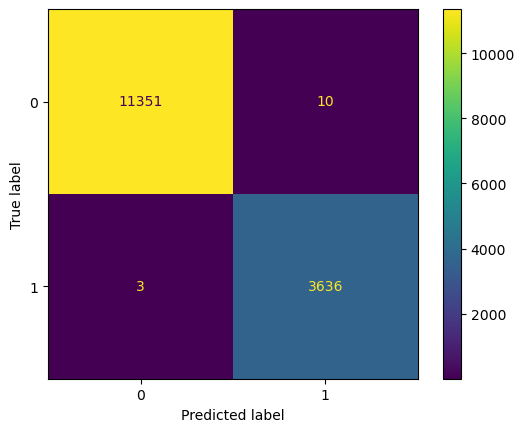

In [50]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predxg)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1])
cm_display.plot()
plt.show()

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predk = knn.predict(x_test)
print("Accuracy of KNN model:", accuracy_score(y_test, y_predk))
print("\nClassification Report:\n", classification_report(y_test, y_predk))

Accuracy of KNN model: 0.9000666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     11361
           1       0.85      0.71      0.78      3639

    accuracy                           0.90     15000
   macro avg       0.88      0.84      0.86     15000
weighted avg       0.90      0.90      0.90     15000



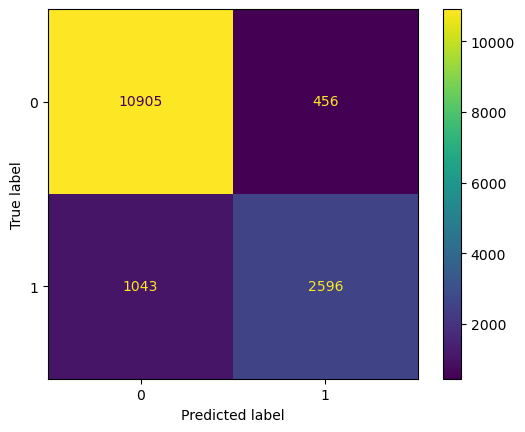

In [52]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predk)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1])
cm_display.plot()
plt.show()

# **Regression Model**

In [53]:
df1.head()

Age     Income  Marital_Status  Gender  Education_Level  \
0   66   91643.09               0       0                3   
1   47   30683.60               1       1                1   
2   52  125322.93               2       0                3   
3   65   31508.33               2       1                1   
4   31   75736.11               1       0                1   

   Purchases_in_Last_Month  Online_Activity_Level  Product_Interest  \
0                        1                   0.26                 2   
1                        5                   0.26                 0   
2                        2                   0.85                 2   
3                        6                   0.31                 0   
4                        2                   0.21                 0   

   Days_Since_Last_Purchase  Customer_Loyalty_Score  Income_Category  \
0                       346                    0.18                0   
1                        39                    6.40                1   
2                       154                    6.18                0   
3                        33                    3.31                1   
4                       277                    4.39                1   

   Age_Income_Ratio  Is_Young_Professional  Online_Purchase_Tendency  \
0            0.0007                      0                      0.26   
1            0.0015                      0                      1.30   
2            0.0004                      0                      1.70   
3            0.0021                      0                      1.86   
4            0.0004                      1                      0.42   

   Will_Purchase  Annual_Spending  
0              0          4173.07  
1              0          5464.92  
2              0          9310.01  
3              0          6488.02  
4              0          6233.64

**Skewness and Kurtosis**

**Skewness** - It measures how assymetric your data is.

**Positive Skew** - Tail is on right side longer (value is greater than 0)

**Negative Skew** - Tail is on left side longer (value is less than 0)

**No Skew** - Distribution is symmetric (value is 0 or closed to zero)

**Kurtosis** - Kurtosis describes shape of distribution tail and peak of the data and it also tails outliers in the data.

**Positive Kurtosis** - Kurtosis **> 3**  (more outliers, sharper peak)

**Negative Kurtosis** - Kurtosis **< 3**  (less outliers, flatter peak)

**Normal Kurtosis** - Kurtosis **= 3**  (more outliers, normal distribution)

In [54]:
from scipy.stats import skew, kurtosis 
for column in numerical_columns:
    print(f"{column}: Skewness={skew(df1[column])}, Kurtosis={kurtosis(df1[column])}")

Age: Skewness=0.006172620454453492, Kurtosis=-1.201301217511622
Income: Skewness=0.00016299049597200021, Kurtosis=-1.2014275161376304
Purchases_in_Last_Month: Skewness=0.00025328580738183366, Kurtosis=-1.2088629153456796
Online_Activity_Level: Skewness=0.001181196910865661, Kurtosis=-1.1915896194657338
Days_Since_Last_Purchase: Skewness=-0.0016526870541284729, Kurtosis=-1.1954248935972287
Customer_Loyalty_Score: Skewness=0.005805885424069166, Kurtosis=-1.1998718703476865
Age_Income_Ratio: Skewness=1.9016561464933859, Kurtosis=4.181302648186481
Is_Young_Professional: Skewness=1.3160073029103736, Kurtosis=-0.2681247786865639
Online_Purchase_Tendency: Skewness=0.8932507115577176, Kurtosis=0.024134782086492557
Will_Purchase: Skewness=1.1934930836986204, Kurtosis=-0.5755742591635578
Annual_Spending: Skewness=-0.015575098378602796, Kurtosis=-0.14272771120317307


In [55]:
from scipy.stats import zscore

# Z-score for numerical features
z_scores = df1[["Age","Income","Purchases_in_Last_Month","Online_Activity_Level","Days_Since_Last_Purchase","Customer_Loyalty_Score","Age_Income_Ratio","Is_Young_Professional","Online_Purchase_Tendency","Will_Purchase","Annual_Spending"]].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of Outliers: {outliers.sum()}")

Number of Outliers: 1448


In [56]:
#calculating annova for categorical columns
#if p_value is near to 0 it means the specific categorical column has imapct on dependant feature
from scipy.stats import f_oneway
for feature in categorical_columns:
    groups=[df1[df1[feature]==group]["Annual_Spending"] for group in df1[feature].unique()]
    f_stat,p_value=f_oneway(*groups)
    print(f"ANOVA results for {feature}:")
    print(f"F-statistics: {f_stat: 2f}")
    print(f"P-value: {p_value: 4f}")

ANOVA results for Marital_Status:
F-statistics:  0.347915
P-value:  0.706161
ANOVA results for Gender:
F-statistics:  0.457356
P-value:  0.498865
ANOVA results for Education_Level:
F-statistics:  0.329459
P-value:  0.804064
ANOVA results for Product_Interest:
F-statistics:  1.124271
P-value:  0.337647
ANOVA results for Income_Category:
F-statistics:  11787.953984
P-value:  0.000000


**Income_category has strongly effect on Annual spending**

**Marital_Status, Gender, Education_Level, Product_Interest has neglible effect on Annual Spending**


In [57]:
#dropping features which have high p value....means p value not near to zero
df1 = df1.drop(columns=['Marital_Status'])
df1 = df1.drop(columns=['Gender'])
df1 = df1.drop(columns=['Education_Level'])
df1 = df1.drop(columns=['Income_Category'])

In [58]:
df1.head()         #printing first five rows

Age     Income  Purchases_in_Last_Month  Online_Activity_Level  \
0   66   91643.09                        1                   0.26   
1   47   30683.60                        5                   0.26   
2   52  125322.93                        2                   0.85   
3   65   31508.33                        6                   0.31   
4   31   75736.11                        2                   0.21   

   Product_Interest  Days_Since_Last_Purchase  Customer_Loyalty_Score  \
0                 2                       346                    0.18   
1                 0                        39                    6.40   
2                 2                       154                    6.18   
3                 0                        33                    3.31   
4                 0                       277                    4.39   

   Age_Income_Ratio  Is_Young_Professional  Online_Purchase_Tendency  \
0            0.0007                      0                      0.26   
1            0.0015                      0                      1.30   
2            0.0004                      0                      1.70   
3            0.0021                      0                      1.86   
4            0.0004                      1                      0.42   

   Will_Purchase  Annual_Spending  
0              0          4173.07  
1              0          5464.92  
2              0          9310.01  
3              0          6488.02  
4              0          6233.64

In [59]:
#scaling
scaler=StandardScaler()
df1[numerical_columns]=scaler.fit_transform(df1[numerical_columns])

In [60]:
df1.head()     

Age    Income  Purchases_in_Last_Month  Online_Activity_Level  \
0  1.437148  0.170780                -1.473337              -1.119724   
1  0.195901 -1.452090                -0.779228              -1.119724   
2  0.522545  1.067408                -1.299809               1.150186   
3  1.371820 -1.430134                -0.605700              -0.927359   
4 -0.849359 -0.252698                -1.299809              -1.312090   

   Product_Interest  Days_Since_Last_Purchase  Customer_Loyalty_Score  \
0                 2                  1.555733               -1.662382   
1                 0                 -1.361810                0.491613   
2                 2                 -0.268919                0.415426   
3                 0                 -1.418830               -0.578459   
4                 0                  0.899999               -0.204453   

   Age_Income_Ratio  Is_Young_Professional  Online_Purchase_Tendency  \
0          0.040641              -0.539063                 -1.158252   
1          1.624637              -0.539063                 -0.915806   
2         -0.553357              -0.539063                 -0.822558   
3          2.812634              -0.539063                 -0.785259   
4         -0.553357               1.855070                 -1.120952   

   Will_Purchase  Annual_Spending  
0      -0.567773        -1.015997  
1      -0.567773        -0.583262  
2      -0.567773         0.704738  
3      -0.567773        -0.240552  
4      -0.567773        -0.325762

In [61]:
#splitting X for training and Y for testing in 80% and 20%
X=df1.drop(columns=["Annual_Spending"])
Y=df1["Annual_Spending"]

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

MAE: Average error in Annual_Spending predictions.
MSE: Penalizes large errors more.
R^2 : Measures how well features explain Annual_Spending variation.

In [63]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_train_pred = lr_model.predict(X_train)
Y_test_pred = lr_model.predict(X_test)
lr_metrics = {
    'Model': 'Linear Regression',
    'Train MAE': mean_absolute_error(Y_train, Y_train_pred),
    'Test MAE': mean_absolute_error(Y_test, Y_test_pred),
    'Train MSE': mean_squared_error(Y_train, Y_train_pred),
    'Test MSE': mean_squared_error(Y_test, Y_test_pred),
    'Train R²': r2_score(Y_train, Y_train_pred),
    'Test R²': r2_score(Y_test, Y_test_pred),
}

print(lr_metrics)

{'Model': 'Linear Regression', 'Train MAE': 0.537613287745028, 'Test MAE': 0.5340689602648259, 'Train MSE': 0.45159488297145717, 'Test MSE': 0.45002396019007374, 'Train R²': 0.5466171853624531, 'Test R²': 0.5569083160456645}


In [64]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
Y_train_pred = dt_model.predict(X_train)
Y_test_pred = dt_model.predict(X_test)
dt_metrics = {
    'Model': 'Decision Tree',
    'Train MAE': mean_absolute_error(Y_train, Y_train_pred),
    'Test MAE': mean_absolute_error(Y_test, Y_test_pred),
    'Train MSE': mean_squared_error(Y_train, Y_train_pred),
    'Test MSE': mean_squared_error(Y_test, Y_test_pred),
    'Train R²': r2_score(Y_train, Y_train_pred),
    'Test R²': r2_score(Y_test, Y_test_pred),
}
print(dt_metrics)

{'Model': 'Decision Tree', 'Train MAE': 0.0, 'Test MAE': 0.7866362695848614, 'Train MSE': 0.0, 'Test MSE': 0.9747725398964713, 'Train R²': 1.0, 'Test R²': 0.04024308840634283}


In [66]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, Y_train)
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Train MAE': mean_absolute_error(Y_train, Y_train_pred),
    'Test MAE': mean_absolute_error(Y_test, Y_test_pred),
    'Train MSE': mean_squared_error(Y_train, Y_train_pred),
    'Test MSE': mean_squared_error(Y_test, Y_test_pred),
    'Train R²': r2_score(Y_train, Y_train_pred),
    'Test R²': r2_score(Y_test, Y_test_pred),
}
print(rf_metrics)

{'Model': 'Random Forest', 'Train MAE': 0.20525492360905354, 'Test MAE': 0.5513188604600867, 'Train MSE': 0.06712204993509188, 'Test MSE': 0.47995699507524325, 'Train R²': 0.9326122038328379, 'Test R²': 0.5274363767570724}


In [67]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, Y_train)
Y_train_pred = xgb_model.predict(X_train)
Y_test_pred = xgb_model.predict(X_test)
xgb_metrics = {
    'Model': 'XGBoost',
    'Train MAE': mean_absolute_error(Y_train, Y_train_pred),
    'Test MAE': mean_absolute_error(Y_test, Y_test_pred),
    'Train MSE': mean_squared_error(Y_train, Y_train_pred),
    'Test MSE': mean_squared_error(Y_test, Y_test_pred),
    'Train R²': r2_score(Y_train, Y_train_pred),
    'Test R²': r2_score(Y_test, Y_test_pred),
}
print(xgb_metrics)

{'Model': 'XGBoost', 'Train MAE': 0.4598071093272147, 'Test MAE': 0.5505731770523888, 'Train MSE': 0.3356104719634185, 'Test MSE': 0.47820100489164463, 'Train R²': 0.6630607959961596, 'Test R²': 0.5291653172497728}


In [68]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)
Y_train_pred = mlr_model.predict(X_train)
Y_test_pred = mlr_model.predict(X_test)
mlr_metrics = {
    'Model': 'Multiple Linear Regression',
    'Train MAE': mean_absolute_error(Y_train, Y_train_pred),
    'Test MAE': mean_absolute_error(Y_test, Y_test_pred),
    'Train MSE': mean_squared_error(Y_train, Y_train_pred),
    'Test MSE': mean_squared_error(Y_test, Y_test_pred),
    'Train R²': r2_score(Y_train, Y_train_pred),
    'Test R²': r2_score(Y_test, Y_test_pred),
}
print(mlr_metrics)

{'Model': 'Multiple Linear Regression', 'Train MAE': 0.537613287745028, 'Test MAE': 0.5340689602648259, 'Train MSE': 0.45159488297145717, 'Test MSE': 0.45002396019007374, 'Train R²': 0.5466171853624531, 'Test R²': 0.5569083160456645}
